In [10]:
import pickle
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 做圖

In [2]:
df = pd.read_csv("./vehicles_v2.csv")
df = df.drop(['Unnamed: 0', 'region','posting_date'], axis=1)
df = df.dropna()
df = df.drop(df[df.price == 0].index)
df = df.drop(df[df.price < 1450].index)
df = df.drop(df[df.price > 42990].index)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al
6,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,al
7,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,coupe,red,al
11,36990,2013.0,bmw,m3 coupe 2d,good,8 cylinders,gas,50956.0,clean,other,rwd,coupe,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,sedan,black,wi
458206,5300,2013.0,chevrolet,captiva,excellent,4 cylinders,gas,140000.0,clean,automatic,fwd,SUV,blue,wi
458208,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi
458209,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi


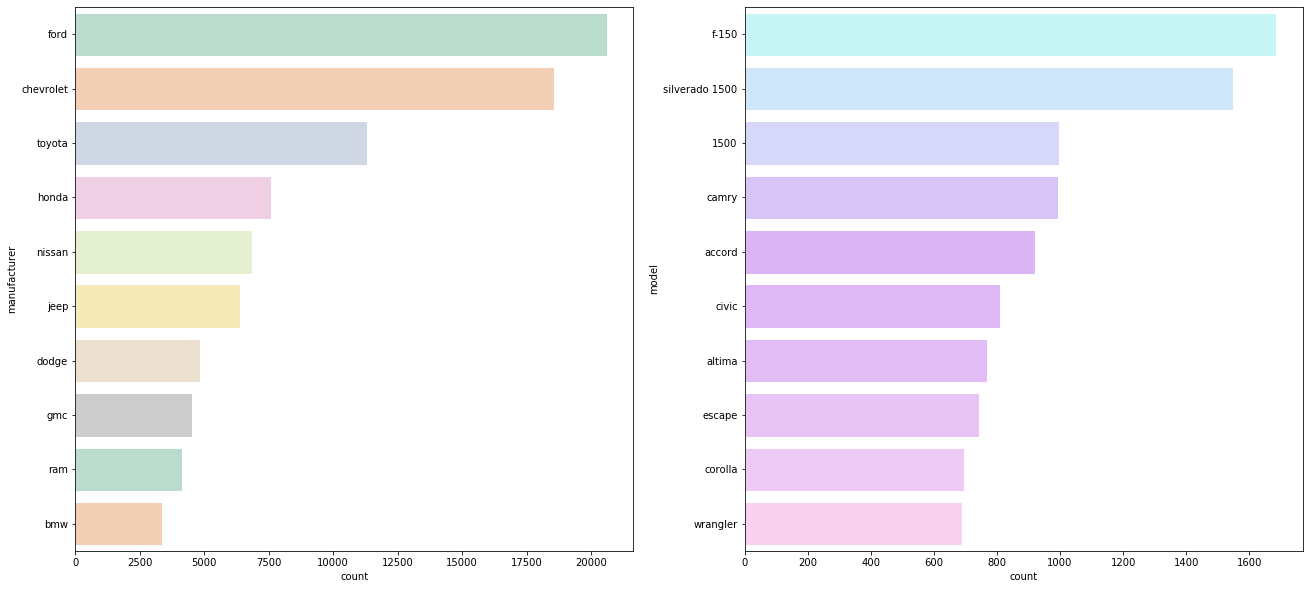

In [3]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))

fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

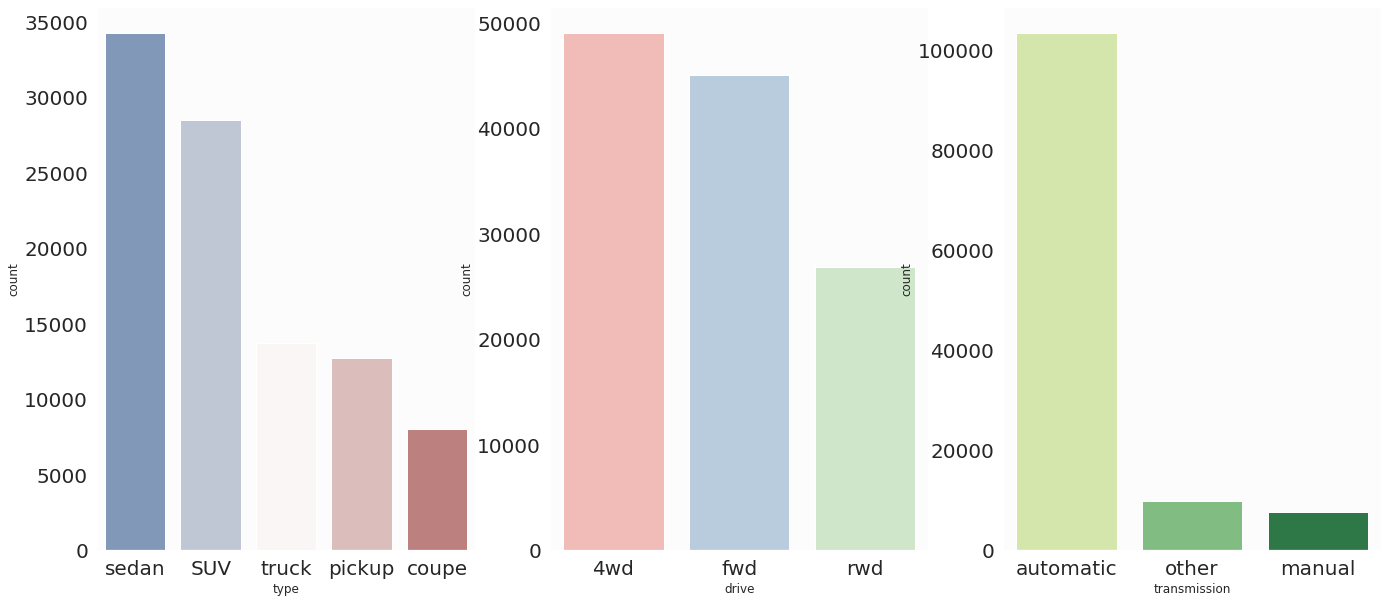

In [4]:
fig, ax =plt.subplots(1,3,figsize=(23, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':30,'ytick.labelsize':30})
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drive',data = df,order=df.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

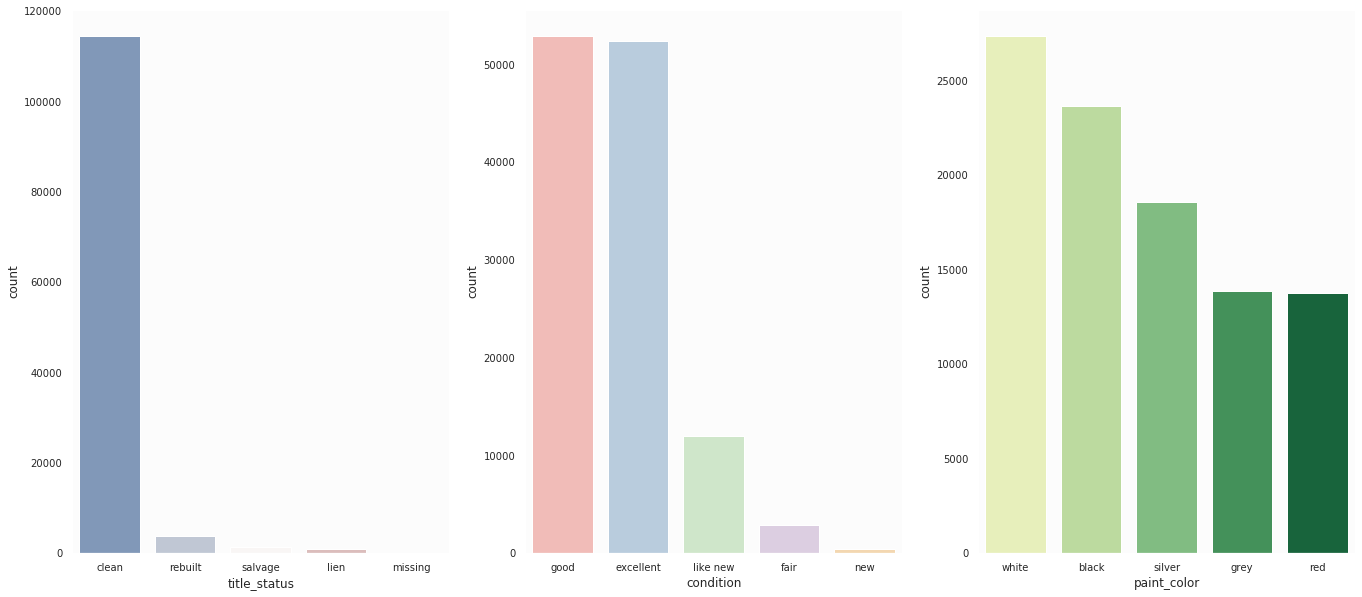

In [9]:
fig, ax =plt.subplots(1,3,figsize=(23, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
sns.countplot(x ='title_status',data = df,order=df.title_status.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='condition',data = df,order=df.condition.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='paint_color',data = df,order=df.paint_color.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

In [6]:
df_ford = df[df['manufacturer'] == 'ford'] 
df_c=df[df['manufacturer'] == 'chevrolet']
df_toyata = df[df['manufacturer'] == 'toyata'] 
df_honda=df[df['manufacturer'] == 'honda']
df_nissan = df[df['manufacturer'] == 'nissan'] 
df_jeep=df[df['manufacturer'] == 'jeep']
df_dodge = df[df['manufacturer'] == 'dodge'] 
df_gmc=df[df['manufacturer'] == 'gmc']
df_hyundai = df[df['manufacturer'] == 'hyundai'] 
df_ram=df[df['manufacturer'] == 'ram']

model = df_ford['model'].value_counts()
model_f = model.iloc[0:10]
df1=model_f.to_frame()
df1["Manufacturer"] = "ford"

model = df_c['model'].value_counts()
model_c = model.iloc[0:10]
df2=model_c.to_frame()
df2["Manufacturer"] = "chevrolet"

model = df_toyata['model'].value_counts()
model_toyata = model.iloc[0:10]
df3=model_toyata.to_frame()
df3["Manufacturer"] = "toyata"

model = df_honda['model'].value_counts()
model_honda = model.iloc[0:10]
df4=model_honda.to_frame()
df4["Manufacturer"] = "honda"

model = df_nissan['model'].value_counts()
model_nissan = model.iloc[0:10]
df5=model_nissan.to_frame()
df5["Manufacturer"] = "nissan"

model = df_jeep['model'].value_counts()
model_jeep = model.iloc[0:10]
df6=model_jeep.to_frame()
df6["Manufacturer"] = "jeep"

model = df_dodge['model'].value_counts()
model_dodge = model.iloc[0:10]
df7=model_dodge.to_frame()
df7["Manufacturer"] = "dodge"

model = df_gmc['model'].value_counts()
model_gmc = model.iloc[0:10]
df8=model_gmc.to_frame()
df8["Manufacturer"] = "gmc"

model = df_hyundai['model'].value_counts()
model_hyundai = model.iloc[0:10]
df9=model_hyundai.to_frame()
df9["Manufacturer"] = "hyundai"

model = df_ram['model'].value_counts()
model_ram = model.iloc[0:10]
df0=model_ram.to_frame()
df0["Manufacturer"] = "ram"

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df0]
result = pd.concat(frames)

result=result.reset_index()

fig =px.sunburst(
    result,path=['Manufacturer','index'],values='model', color='Manufacturer'
                  )
fig.update_layout(margin=dict(t=1, b=1, r=1, l=1))
fig.show()

### 建構資料

In [7]:
with open('dataset.pickle', 'rb') as fp:
    dataset = pickle.load(fp)

In [8]:
x_subtrain = dataset['x_subtrain']
x_stack = dataset['x_stack']
x_valid = dataset['x_valid']
x_test = dataset['x_test']
y_subtrain = dataset['y_subtrain']
y_stack = dataset['y_stack']
y_valid = dataset['y_valid']
y_test = dataset['y_test']

In [12]:
x_stacktrain = np.append(x_subtrain, x_valid, axis=0)
x_train = np.append(x_stacktrain, x_stack, axis=0)
y_stacktrain = np.append(y_subtrain, y_valid, axis=0)
y_train = np.append(y_stacktrain, y_stack, axis=0)

In [14]:
print(x_subtrain.shape, y_subtrain.shape)
print(x_stack.shape, y_stack.shape)
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_stacktrain.shape, y_stacktrain.shape)
print(x_test.shape, y_test.shape)

(77419, 1739) (77419,)
(9677, 1739) (9677,)
(9678, 1739) (9678,)
(96774, 1739) (96774,)
(87097, 1739) (87097,)
(24194, 1739) (24194,)


### Lasso Regression

In [33]:
myLasso = Lasso(alpha=0.1, fit_intercept=True, max_iter=10)
myLasso.fit(x_subtrain, y_subtrain)
ypred = myLasso.predict(x_valid)
print("RMSE:", mean_squared_error(ypred, y_valid, squared=False), "MAE:", mean_absolute_error(ypred, y_valid))

RMSE: 5517.505048910427 MAE: 3735.1999918589236


### LGBM

In [34]:
model = LGBMRegressor(num_leaves=1000, n_estimators=500)
model.fit(x_subtrain, y_subtrain)
ypred = model.predict(x_valid)
print("RMSE:", mean_squared_error(ypred, y_valid, squared=False), "MAE:", mean_absolute_error(ypred, y_valid))

RMSE: 2503.235409789449 MAE: 1427.401892929831


### Random Forest

In [37]:
regr = RandomForestRegressor()
regr.fit(x_subtrain, y_subtrain)
ypred = regr.predict(x_valid)
print("RMSE:", mean_squared_error(ypred, y_valid, squared=False), "MAE:", mean_absolute_error(ypred, y_valid))

RMSE: 2678.300736358895 MAE: 1518.0323592341367


### LGBM Tuning 

#### Tuning Learning rate & n_estimators

In [ ]:
lgbmRec = {}

Leaning_Rate = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
n_estimators = [100, 300, 800, 2000, 3500, 5000, 7000]

bestRMSE = 5000
bestModel = None
bestL = 0
bestN = 0

for Lr in Leaning_Rate:
    lr = {}
    for N in n_estimators:
        model = LGBMRegressor(learning_rate=Lr, n_estimators=N, num_leaves=300, max_depth=9)
        model.fit(x_subtrain, y_subtrain)
        trainOut = model.predict(x_valid)
        Rmse = mean_squared_error(trainOut, y_valid)**(1/2)
        if bestRMSE>Rmse:
            bestModel = model
            bestL = Lr
            bestN = N
        print('learning_rate:', Lr, "n_estimators:", N, Rmse)
        lr[str(N)+' estimators'] = Rmse
    lgbmRec[str(Lr)] = lr

In [22]:
with open('LGBMtuning_lr.pickle', 'rb') as fp:
    lgbmReclr = pickle.load(fp)

In [23]:
pd.DataFrame(lgbmReclr['lgbmRec']).rename(index={'100 estimators': 100, '300 estimators': 300, '800 estimators': 800, '2000 estimators': 2000, '3500 estimators': 3500, '5000 estimators': 5000, '7000 estimators': 7000})

,0.1,0.3,0.5,0.7,0.9,1
100,2939.325398,2810.229487,2892.332817,2946.917018,3096.240358,3151.610071
300,2798.227533,2679.806531,2766.937143,2872.205429,3053.312549,3147.148025
800,2691.065444,2621.722311,2736.112049,2895.638649,3083.879844,3182.215281
2000,2616.762653,2598.654408,2729.182499,2904.486426,3131.071893,3203.251037
3500,2593.595309,2610.107246,2745.769680,2928.309775,3155.221002,3234.292442
5000,2584.583670,2619.163274,2758.649797,2940.187560,3171.203700,3244.423838
7000,2580.293084,2636.454956,2775.433543,2953.276529,3177.355319,3254.825710


In [25]:
rmse = []
n = []
lr = []

for a in lgbmReclr['lgbmRec'].keys():
    for j in lgbmReclr['lgbmRec'][a].keys():
        rmse.append(lgbmReclr['lgbmRec'][a][j])
        n.append(j.split()[0])
        lr.append((float)(a))

In [26]:
total = {'n_estimators': n, "learning_rate": lr, "RMSE": rmse}
total = pd.DataFrame(total)
total

,n_estimators,learning_rate,RMSE
0,100,0.1,2939.325398
1,300,0.1,2798.227533
2,800,0.1,2691.065444
3,2000,0.1,2616.762653
4,3500,0.1,2593.595309
5,5000,0.1,2584.583670
6,7000,0.1,2580.293084
7,100,0.3,2810.229487
8,300,0.3,2679.806531
9,800,0.3,2621.722311


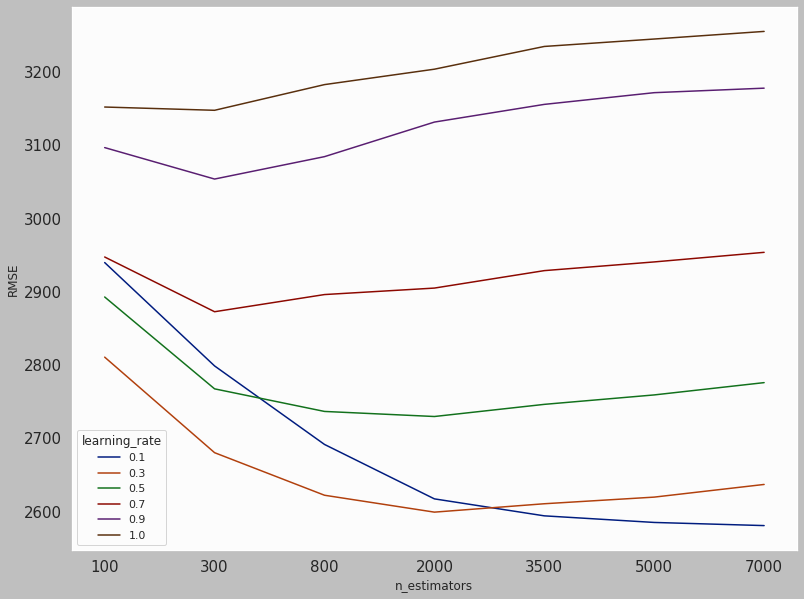

In [27]:
n_color = np.random.rand(len(n))
l_color = np.random.rand(len(lr))

plt.style.use("grayscale")
plt.figure(figsize=(13, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.lineplot(x="n_estimators", y="RMSE", data=total, hue="learning_rate", palette="dark")

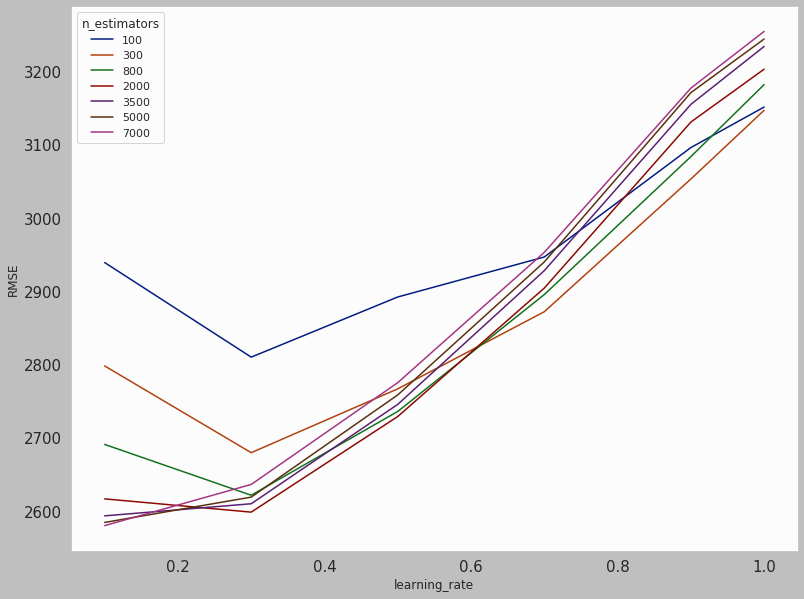

In [28]:
plt.style.use("grayscale")
plt.figure(figsize=(13, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.lineplot(x="learning_rate", y="RMSE", data=total, hue="n_estimators", palette="dark")

#### Tuning Leaves & n_estimators

In [ ]:
lgbmRec = {}

Leaves = [30, 70, 150, 300, 700, 1200]
n_estimators = [100, 300, 800, 2000, 3500, 5000, 7000, 10000]
bestRMSE = 5000
bestPara = {'Leaves': 30, 'n_estimators': 100}

for L in Leaves:
    lea = {}
    for N in n_estimators:
        model = LGBMRegressor(num_leaves=L, n_estimators=N)
        model.fit(x_subtrain, y_subtrain)
        trainOut = model.predict(x_valid)
        Rmse = mean_squared_error(trainOut, y_valid)**(1/2)
        if Rmse < bestRMSE:
            bestRMSE = Rmse
            bestPara['Leaves'] = L
            bestPara['n_estimators'] = N
        lea[str(N)+' estimators'] = Rmse
    lgbmRec[str(L)+ ' leaves'] = lea

In [16]:
with open('LGBMtuning.pickle', 'rb') as fp:
    lgbmRec = pickle.load(fp)

In [17]:
dao = pd.DataFrame(lgbmRec).rename(index={'100 estimators': 100, '300 estimators': 300, '800 estimators': 800, '2000 estimators': 2000, '3500 estimators': 3500, '5000 estimators': 5000, '7000 estimators': 7000, '10000 estimators': 10000})
dao.columns = ["30 leaves", "70 leaves", "150 leaves", "300 leaves", "700 leaves", "1200 leaves"]

rmse = []
n = []
leaves = []

for a in lgbmRec.keys():
    for j in lgbmRec[a].keys():
        rmse.append(lgbmRec[a][j])
        n.append(j.split()[0])
        leaves.append(a[0])

total = {'n_estimators': n, "leaves": leaves, "RMSE": rmse}
total = pd.DataFrame(total)

n_color = np.random.rand(len(n))
l_color = np.random.rand(len(leaves))

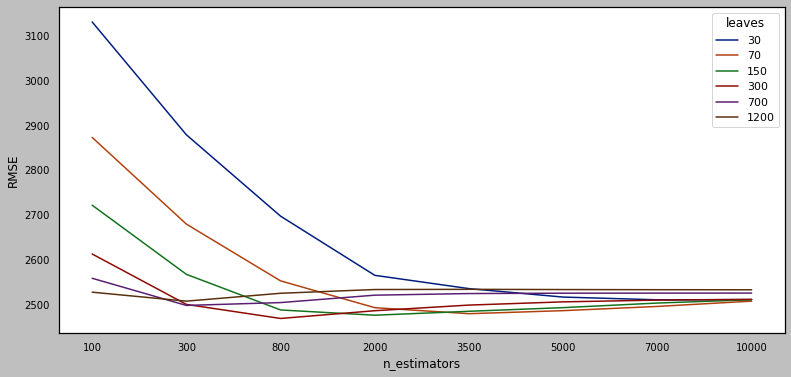

In [18]:
# n_estimators to RMSE
plt.style.use("grayscale")
plt.figure(figsize=(13, 6))
sns.lineplot(x="n_estimators", y="RMSE", data=total, hue="leaves", palette="dark")

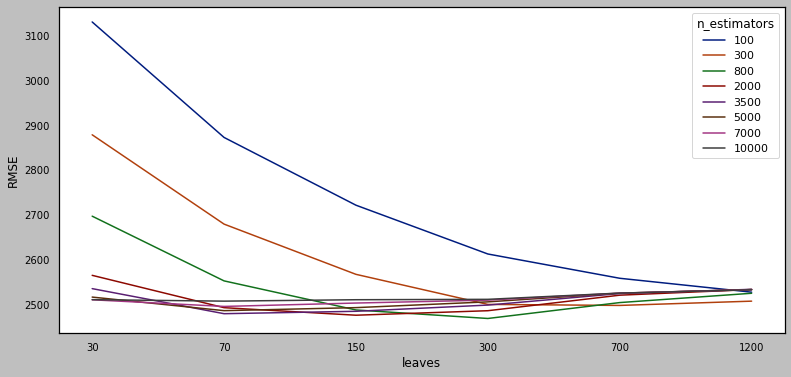

In [19]:
# leaves to RMSE
plt.figure(figsize=(13, 6))
sns.lineplot(x="leaves", y="RMSE", data=total, hue="n_estimators", palette="dark")

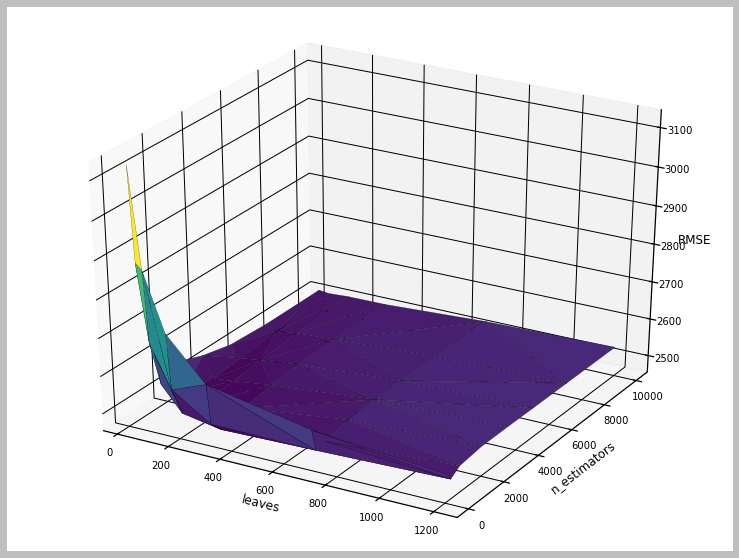

In [20]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Transform it to a long format
df=total
df.columns=["X","Y","Z"]

# Make the plot
plt.style.use('grayscale')
fig = plt.figure(figsize=(13, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('leaves')
ax.set_ylabel('n_estimators')
ax.set_zlabel('RMSE')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()


### LGBM Test

In [21]:
model = LGBMRegressor(num_leaves=300, n_estimators=800)
model.fit(x_train, y_train)
ypred = model.predict(x_test)
print("RMSE:", mean_squared_error(ypred, y_test, squared=False), "MAE:", mean_absolute_error(ypred, y_test))

RMSE: 2521.765013966043 MSE: 1448.9085627215138


### Random Forest Tuning

In [ ]:
n_estimators = [3, 8, 20, 30, 50, 70, 100, 120, 150]

for N in range(len(n_estimators)):
    model = RandomForestRegressor(n_estimators=n_estimators[N])
    model.fit(x_subtrain, y_subtrain)
    trainOut = model.predict(x_valid)
    Rmse = mean_squared_error(trainOut, y_valid)**(1/2)
    rdfRec[str(n_estimators[N])+' estimators'] = Rmse

In [30]:
with open('RDFtuning.pickle', 'rb') as fp:
    RDFRec = pickle.load(fp)
RDFRec

{'3 estimators': 3154.037339299123,
 '8 estimators': 2838.979512452945,
 '20 estimators': 2733.082985148443,
 '30 estimators': 2699.819023808897,
 '50 estimators': 2689.559406881423,
 '70 estimators': 2680.7707244603275,
 '100 estimators': 2677.6408200434616,
 '120 estimators': 2665.358596503536,
 '150 estimators': 2670.4682717401774}

In [31]:
rdfRMSE = []
rdfEstimators = []

for i in RDFRec.keys():
    rdfRMSE.append(RDFRec[i])
    rdfEstimators.append(i.split()[0])

rdfTotal = {'n_estimators': rdfEstimators, 'RMSE': rdfRMSE}
rdfTotal = pd.DataFrame(rdfTotal)
rdfTotal

,n_estimators,RMSE
0,3,3154.037339
1,8,2838.979512
2,20,2733.082985
3,30,2699.819024
4,50,2689.559407
5,70,2680.770724
6,100,2677.640820
7,120,2665.358597
8,150,2670.468272


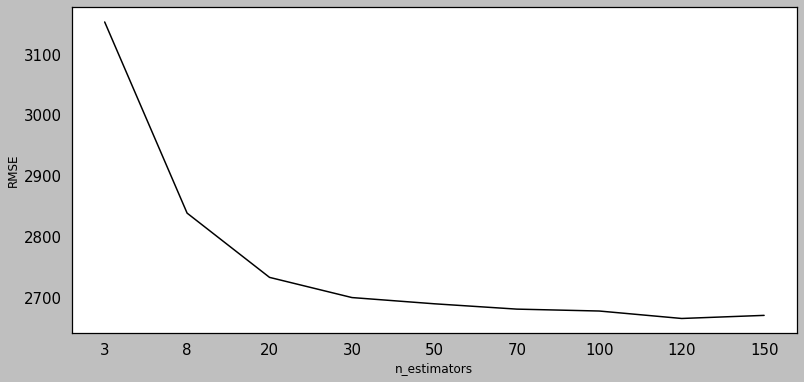

In [32]:
plt.style.use("grayscale")
plt.figure(figsize=(13, 6))
sns.lineplot(x="n_estimators", y="RMSE", data=rdfTotal, palette="dark")

### Random Foreset Test

In [36]:
regr = RandomForestRegressor(n_estimators=120)
regr.fit(x_subtrain, y_subtrain)
ypred = regr.predict(x_valid)
print("RMSE:", mean_squared_error(ypred, y_valid, squared=False), "MAE:", mean_absolute_error(ypred, y_valid))

RMSE: 2675.685865651327 MAE: 1515.7207424297385
